In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("../")
from Plotting.generate_database import ResultsDatabaseGenerator
from Plotting.Plot import BasicPlot, MultiPlot
import pandas as pd
ex_path = "WINE_Hybrid_Noisy_Experiment3"

In [2]:
dbGen = ResultsDatabaseGenerator()
dbGen.initialize_from_folder(ex_path)
data = dbGen.data


In [3]:
config = data[1]['config']
config.pop('__doc__', None)
df = pd.DataFrame(index=data.keys(), columns=config.keys())
df['avg_acc'] = np.nan
df['acc_err'] = np.nan
df['avg_loss'] = np.nan
df['loss_err'] = np.nan
df

,PWB,network_type,num_qumodes,sigma,avg_acc,acc_err,avg_loss,loss_err
244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


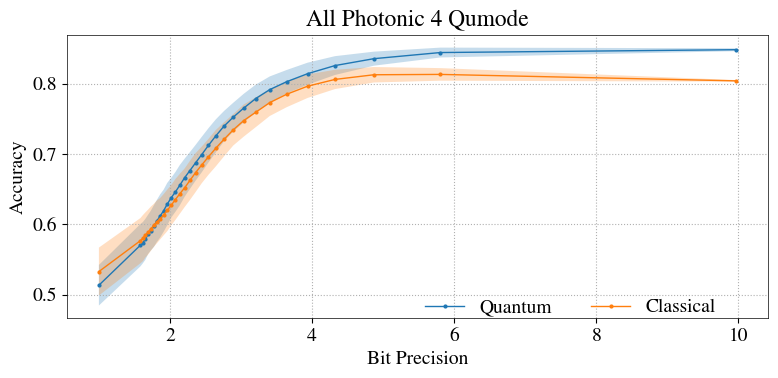

In [4]:
%matplotlib inline

for i in range(1, len(data) + 1):
    config = data[i]['config']
    config.pop('__doc__', None)
    metrics = data[i]['metrics']
    metrics.pop('epoch',None)
    acc, loss = metrics.values()
    avg_acc = np.mean(acc)
    acc_err = np.std(acc)
    avg_loss = np.mean(loss)
    loss_err = np.std(loss)
    df.loc[i] = [*config.values(), avg_acc, acc_err, avg_loss, loss_err]

df = df.sort_values('sigma')

x = np.array(df['sigma'].unique()).astype(float)
x = np.log2(1+1/x)

plot_df = pd.DataFrame(index=x)

mask = (df['PWB']==1) & (df['network_type']=='quantum') & (df['num_qumodes']==4)

acc_q = df[mask]['avg_acc']
acc_err_q = df[mask]['acc_err']
loss_q = df[mask]['avg_loss']
loss_err_q = df[mask]['loss_err']

mask = (df['PWB']==1) & (df['network_type']=='classical') & (df['num_qumodes']==4)

acc_c = df[mask]['avg_acc']
acc_err_c = df[mask]['acc_err']
loss_c = df[mask]['avg_loss']
loss_err_c = df[mask]['loss_err']

plot_df['Ph Q Acc 4'] = acc_q.values
plot_df['Ph Q Acc Err 4'] = acc_err_q.values
plot_df['Ph Q Loss 4'] = loss_q.values
plot_df['Ph Q Loss Err 4'] = loss_err_q.values
plot_df['Ph C Acc 4'] = acc_c.values
plot_df['Ph C Acc Err 4'] = acc_err_c.values
plot_df['Ph C Loss 4'] = loss_c.values
plot_df['Ph C Loss Err 4'] = loss_err_c.values

Plot = MultiPlot([x,x], 
                 [acc_q, acc_c],
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=['Quantum', 'Classical'], 
                 yerr=[acc_err_q, acc_err_c],
                 title='All Photonic 4 Qumode',
                 legend_position_x=0.5,
                 legend_position_y=-0.02)
Plot.options["figure_size_x"] = 8
Plot.options["figure_size_y"] = 4
Plot.plot()


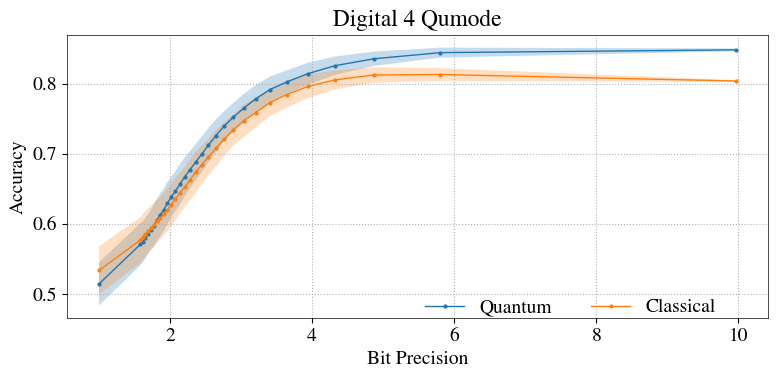

In [5]:
mask = (df['PWB']==0) & (df['network_type']=='quantum') & (df['num_qumodes']==4)

acc_q = df[mask]['avg_acc']
acc_err_q = df[mask]['acc_err']
loss_q = df[mask]['avg_loss']
loss_err_q = df[mask]['loss_err']

mask = (df['PWB']==0) & (df['network_type']=='classical') & (df['num_qumodes']==4)

acc_c = df[mask]['avg_acc']
acc_err_c = df[mask]['acc_err']
loss_c = df[mask]['avg_loss']
loss_err_c = df[mask]['loss_err']


plot_df['TF Q Acc 4'] = acc_q.values
plot_df['TF Q Acc Err 4'] = acc_err_q.values
plot_df['TF Q Loss 4'] = loss_q.values
plot_df['TF Q Loss Err 4'] = loss_err_q.values
plot_df['TF C Acc 4'] = acc_c.values
plot_df['TF C Acc Err 4'] = acc_err_c.values
plot_df['TF C Loss 4'] = loss_c.values
plot_df['TF C Loss Err 4'] = loss_err_c.values

Plot = MultiPlot([x,x], 
                 [acc_q, acc_c],
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=['Quantum', 'Classical'], 
                 yerr=[acc_err_q, acc_err_c],
                 title='Digital 4 Qumode',
                 legend_position_x=0.5,
                 legend_position_y=-0.02)
Plot.options["figure_size_x"] = 8
Plot.options["figure_size_y"] = 4
Plot.plot()

<Figure size 800x400 with 0 Axes>

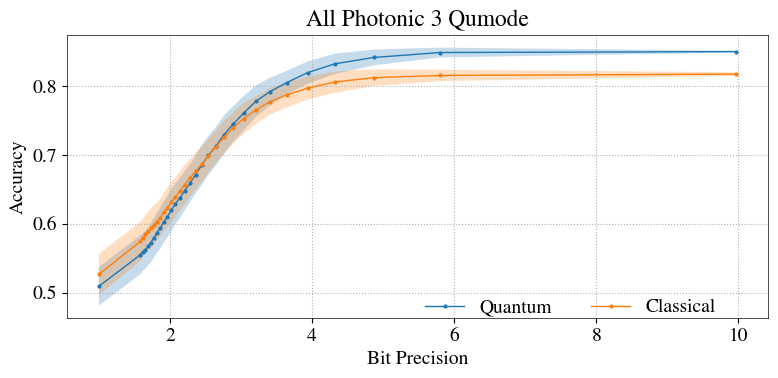

In [6]:
mask = (df['PWB']==1) & (df['network_type']=='quantum') & (df['num_qumodes']==3)

acc_q = df[mask]['avg_acc']
acc_err_q = df[mask]['acc_err']
loss_q = df[mask]['avg_loss']
loss_err_q = df[mask]['loss_err']

mask = (df['PWB']==1) & (df['network_type']=='classical') & (df['num_qumodes']==3)

acc_c = df[mask]['avg_acc']
acc_err_c = df[mask]['acc_err']
loss_c = df[mask]['avg_loss']
loss_err_c = df[mask]['loss_err']

plot_df['Ph Q Acc 3'] = acc_q.values
plot_df['Ph Q Acc Err 3'] = acc_err_q.values
plot_df['Ph Q Loss 3'] = loss_q.values
plot_df['Ph Q Loss Err 3'] = loss_err_q.values
plot_df['Ph C Acc 3'] = acc_c.values
plot_df['Ph C Acc Err 3'] = acc_err_c.values
plot_df['Ph C Loss 3'] = loss_c.values
plot_df['Ph C Loss Err 3'] = loss_err_c.values

fig = plt.figure(
        figsize= (
                8,4))

Plot = MultiPlot([x,x], 
                 [acc_q, acc_c],
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=['Quantum', 'Classical'], 
                 yerr=[acc_err_q, acc_err_c],
                 title='All Photonic 3 Qumode',
                 legend_position_x=0.5,
                 legend_position_y=-0.02)
Plot.options["figure_size_x"] = 8
Plot.options["figure_size_y"] = 4
Plot.plot()

<Figure size 800x400 with 0 Axes>

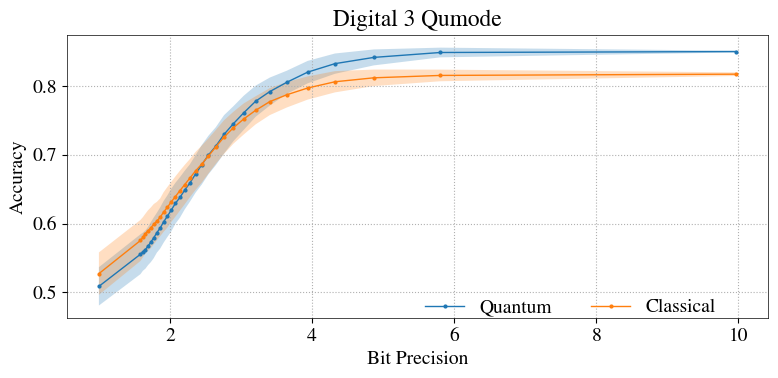

In [7]:
mask = (df['PWB']==0) & (df['network_type']=='quantum') & (df['num_qumodes']==3)

acc_q = df[mask]['avg_acc']
acc_err_q = df[mask]['acc_err']
loss_q = df[mask]['avg_loss']
loss_err_q = df[mask]['loss_err']

mask = (df['PWB']==0) & (df['network_type']=='classical') & (df['num_qumodes']==3)

acc_c = df[mask]['avg_acc']
acc_err_c = df[mask]['acc_err']
loss_c = df[mask]['avg_loss']
loss_err_c = df[mask]['loss_err']

plot_df['TF Q Acc 3'] = acc_q.values
plot_df['TF Q Acc Err 3'] = acc_err_q.values
plot_df['TF Q Loss 3'] = loss_q.values
plot_df['TF Q Loss Err 3'] = loss_err_q.values
plot_df['TF C Acc 3'] = acc_c.values
plot_df['TF C Acc Err 3'] = acc_err_c.values
plot_df['TF C Loss 3'] = loss_c.values
plot_df['TF C Loss Err 3'] = loss_err_c.values

fig = plt.figure(
        figsize= (
                8,4))

Plot = MultiPlot([x,x], 
                 [acc_q, acc_c],
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=['Quantum', 'Classical'], 
                 yerr=[acc_err_q, acc_err_c],
                 title='Digital 3 Qumode',
                 legend_position_x=0.5,
                 legend_position_y=-0.02)
Plot.options["figure_size_x"] = 8
Plot.options["figure_size_y"] = 4
Plot.plot()

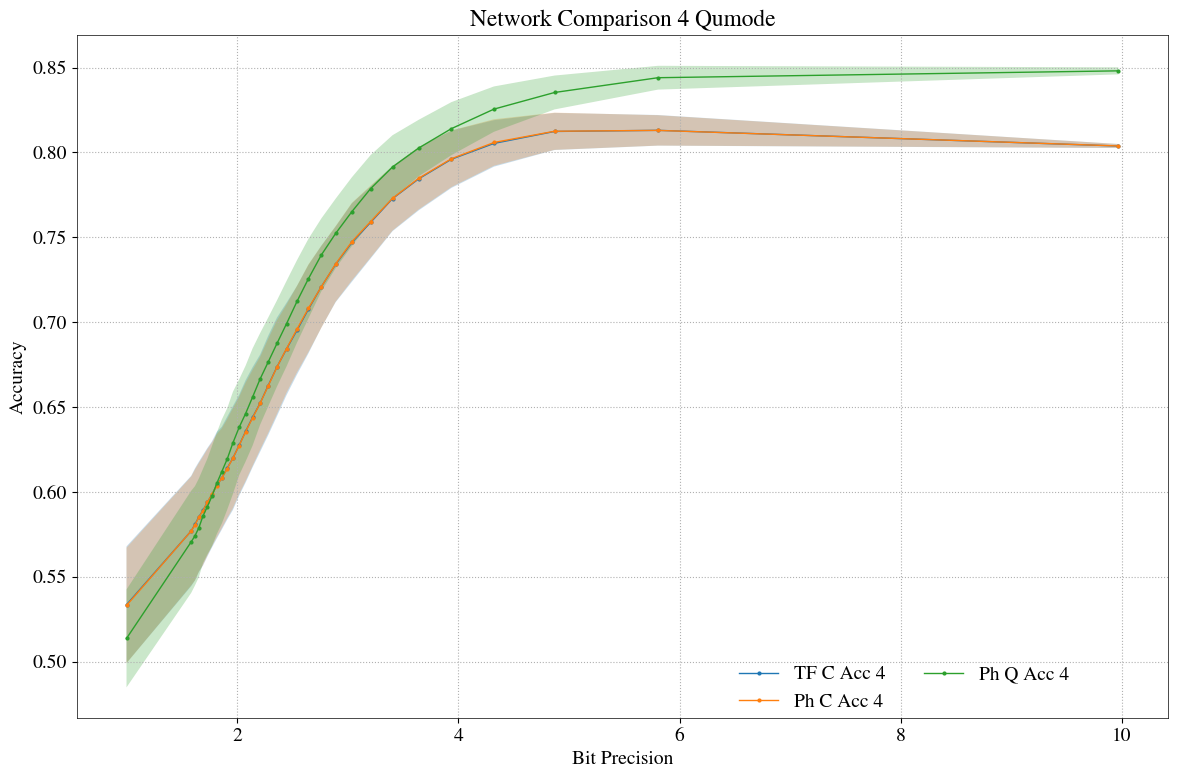

In [8]:
names = ['TF C Acc 4', 'Ph C Acc 4', 'Ph Q Acc 4']
names_err = [n.split(' ') for n in names]
[names_err[i].insert(-1, 'Err') for i,n in enumerate(names_err)]
names_err = [" ".join(names_err[i]) for i,n in enumerate(names_err)]

Plot = MultiPlot([plot_df.index for i in names], 
                 plot_df[names].values.T,
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=[*names], 
                 yerr=plot_df[names_err].values.T,
                 title='Network Comparison 4 Qumode',
                 legend_position_x=0.6,
                 legend_position_y=0.0)
Plot.options["figure_size_x"] = 12
Plot.options["figure_size_y"] = 8
Plot.plot()

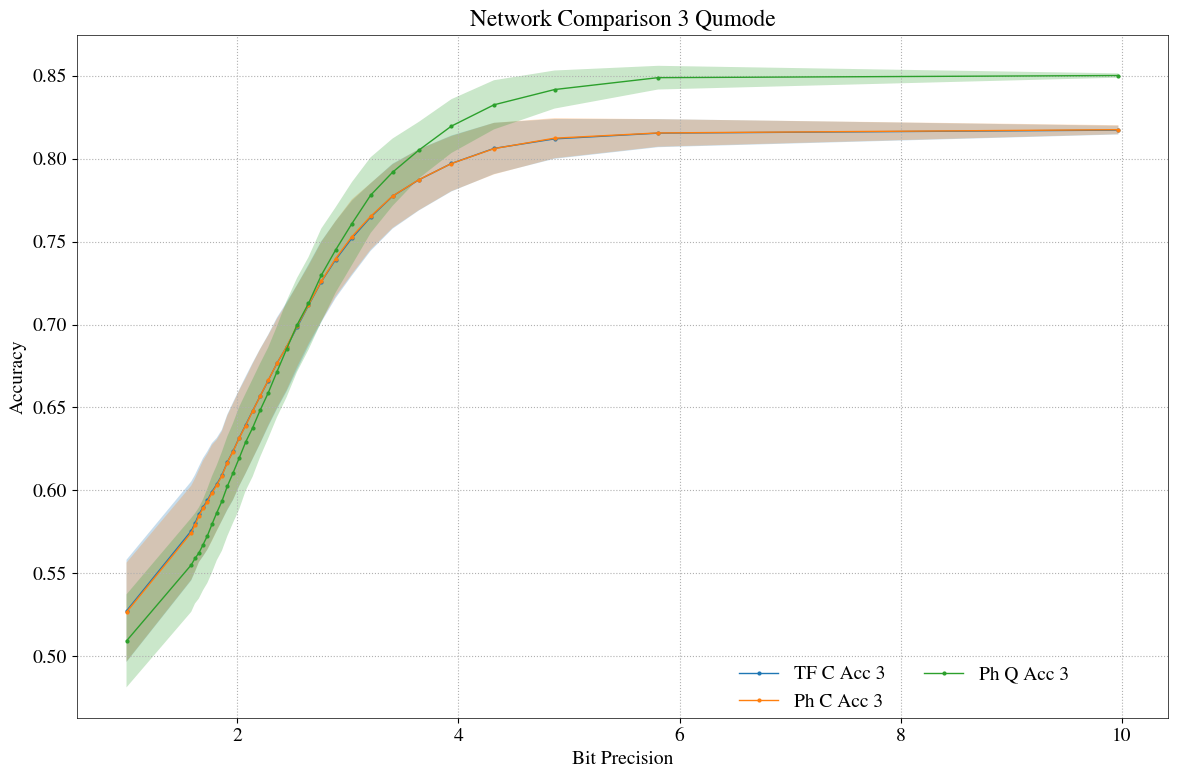

In [9]:
names = ['TF C Acc 3', 'Ph C Acc 3', 'Ph Q Acc 3']
names_err = [n.split(' ') for n in names]
[names_err[i].insert(-1, 'Err') for i,n in enumerate(names_err)]
names_err = [" ".join(names_err[i]) for i,n in enumerate(names_err)]

Plot = MultiPlot([plot_df.index for i in names], 
                 plot_df[names].values.T,
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=[*names], 
                 yerr=plot_df[names_err].values.T,
                 title='Network Comparison 3 Qumode',
                 legend_position_x=0.6,
                 legend_position_y=0.0)
Plot.options["figure_size_x"] = 12
Plot.options["figure_size_y"] = 8
Plot.plot()

In [10]:
dbGen = ResultsDatabaseGenerator()
dbGen.initialize_from_folder("WINE_Noisy_Train2")
data1 = dbGen.data

config = data1[1]['config']
config.pop('__doc__', None)
df = pd.DataFrame(columns=config.keys())
df['acc'] = np.nan
df['loss'] = np.nan
df['val_acc'] = np.nan
df['val_loss'] = np.nan

for i in range(1, len(data1) + 1):
    config = data1[i]['config']
    config.pop('__doc__', None)
    metrics = data1[i]['metrics']
    metrics.pop('epoch',None)
    acc, loss, val_acc, val_loss = metrics.values()
    acc = np.max(acc)
    loss = np.max(loss)
    val_acc = np.max(val_acc)
    val_loss = np.max(-1)
    df.loc[i] = [*config.values(), acc, loss, val_acc, val_loss]
    
func = lambda x: np.log2(1 + 1/x)
df['sigma'] = df['sigma'].apply(func)
df.set_index('sigma', inplace=True)
df.sort_values('sigma', inplace=True)
df

,PWB,network_type,num_qumodes,acc,loss,val_acc,val_loss
sigma,,,,,,,
1.000000,0,classical,3,0.618068,0.687969,0.775000,-1
1.000000,0,classical,4,0.605546,0.700479,0.787500,-1
1.000000,0,quantum,4,0.609123,0.715825,0.795833,-1
1.000000,0,quantum,3,0.618068,0.728173,0.795833,-1
1.584963,0,classical,4,0.669052,0.672950,0.804167,-1
...,...,...,...,...,...,...,...
5.805402,0,quantum,4,0.868515,0.683779,0.833333,-1
9.967226,0,quantum,4,0.876565,0.683662,0.833333,-1
9.967226,0,classical,3,0.864043,0.620014,0.829167,-1


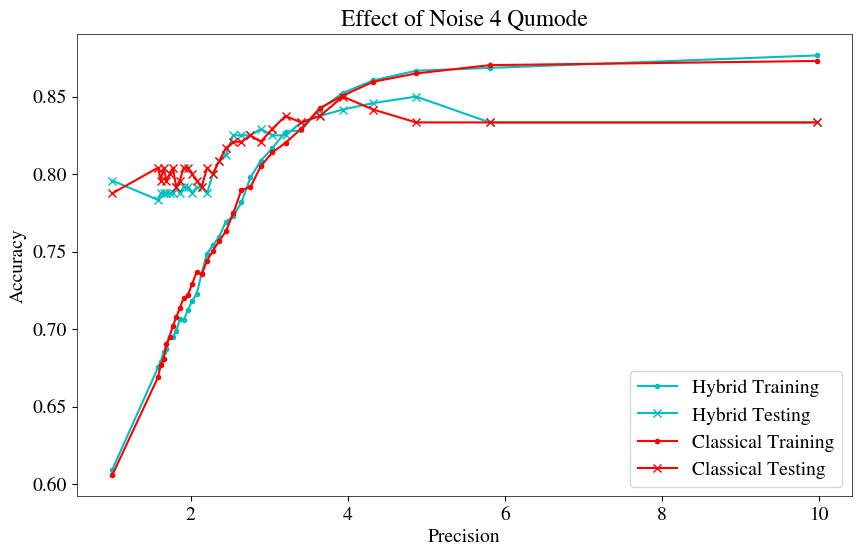

Text(0.5, 1.0, 'Effect of Noise 3 Qumode')

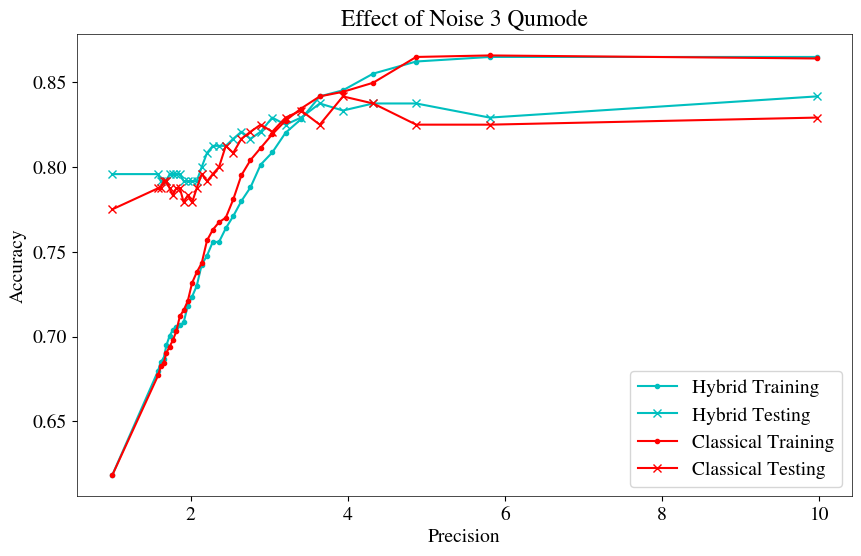

In [11]:
%matplotlib inline
mask = (df['PWB']==0) & (df['network_type']=='quantum') & (df['num_qumodes']==4)
quantum = df[mask]
mask = (df['PWB']==0) & (df['network_type']=='classical') & (df['num_qumodes']==4)
classical = df[mask]
names = ['acc', 'val_acc']

fig = plt.figure(
    figsize=(10,6))
plt.plot(quantum['acc'], marker='.', color='c', label='Hybrid Training')
plt.plot(quantum['val_acc'], marker='x', color='c', label='Hybrid Testing')
plt.plot(classical['acc'], marker='.', color='r', label='Classical Training')
plt.plot(classical['val_acc'], marker='x', color='r', label='Classical Testing')
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Accuracy')
plt.title('Effect of Noise 4 Qumode')
plt.show()

mask = (df['PWB']==0) & (df['network_type']=='quantum') & (df['num_qumodes']==3)
quantum = df[mask]
mask = (df['PWB']==0) & (df['network_type']=='classical') & (df['num_qumodes']==3)
classical = df[mask]
names = ['acc', 'val_acc']

fig = plt.figure(
    figsize=(10,6))
plt.plot(quantum['acc'], marker='.', color='c', label='Hybrid Training')
plt.plot(quantum['val_acc'], marker='x', color='c', label='Hybrid Testing')
plt.plot(classical['acc'], marker='.', color='r', label='Classical Training')
plt.plot(classical['val_acc'], marker='x', color='r', label='Classical Testing')
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Accuracy')
plt.title('Effect of Noise 3 Qumode')

In [12]:
dbGen = ResultsDatabaseGenerator()
dbGen.initialize_from_folder("WINE_Noisy_Train2")
data1 = dbGen.data

config = data1[1]['config']
config.pop('__doc__', None)
df = pd.DataFrame(columns=config.keys())
df['acc'] = np.nan
df['loss'] = np.nan
df['val_acc'] = np.nan
df['val_loss'] = np.nan

for i in range(1, len(data1) + 1):
    config = data1[i]['config']
    config.pop('__doc__', None)
    metrics = data1[i]['metrics']
    metrics.pop('epoch',None)
    acc, loss, val_acc, val_loss = metrics.values()
    df.loc[i] = [*config.values(), acc, loss, val_acc, val_loss]

func = lambda x: np.log2(1 + 1/x)
df['sigma'] = df['sigma'].apply(func)
df.set_index('sigma', inplace=True)
df.sort_values('sigma', inplace=True)

mask = (df['PWB']==0) & (df['network_type']=='quantum') & (df['num_qumodes']==4)
quantum = df[mask]
mask = (df['PWB']==0) & (df['network_type']=='classical') & (df['num_qumodes']==4)
classical = df[mask]

<IPython.core.display.Javascript object>


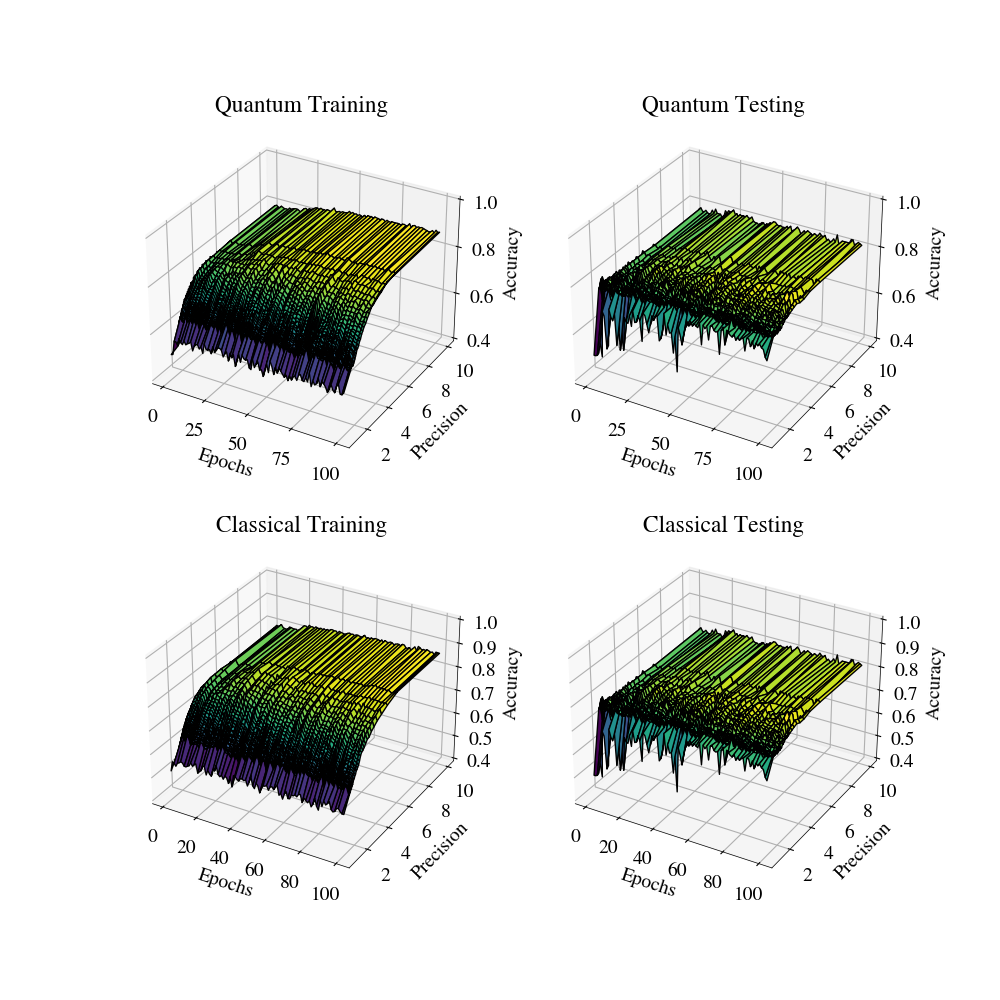

(0.4, 1.0)

In [13]:
%matplotlib notebook
fig = plt.figure(
    figsize=(10,10)
)
ax = fig.add_subplot(2,2,1,projection='3d')
epochs = np.arange(1, 101, 1)
acc, val_acc = quantum['acc'].values, classical['val_acc'].values
acc = np.stack(acc)
val_acc = np.stack(val_acc)
prec = quantum.index
X, Y = np.meshgrid(epochs, prec)

ax.plot_surface(X, Y, acc, cmap='viridis', edgecolor='k')

ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
ax.set_zlabel('Accuracy')
ax.set_title("Quantum Training")
ax.set_zlim(0.4,1)

ax = fig.add_subplot(2,2,2,projection='3d')
ax.plot_surface(X, Y, val_acc, cmap='viridis', edgecolor='k')

ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
ax.set_zlabel('Accuracy')
ax.set_title('Quantum Testing')
ax.set_zlim(0.4,1)

ax = fig.add_subplot(2,2,3,projection='3d')

acc = np.stack(classical['acc'])
val_acc = np.stack(classical['val_acc'])
ax.plot_surface(X, Y, acc, cmap='viridis', edgecolor='k')
ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
ax.set_zlabel('Accuracy')
ax.set_title("Classical Training")
ax.set_zlim(0.4,1)

ax = fig.add_subplot(2,2,4,projection='3d')
ax.plot_surface(X, Y, val_acc, cmap='viridis', edgecolor='k')
ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
ax.set_zlabel('Accuracy')
ax.set_title('Classical Testing')
ax.set_zlim(0.4,1)